In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
import cv2

In [2]:
images = utils.get_data()

In [3]:
autoencoder,encoder = utils.dense_autoencoder()

In [4]:
autoencoder.load_weights("weights/models/dense_autoencoder/dense_autoencoder")

In [5]:
encoder.load_weights("weights/models/dense_autoencoder/dense_encoder")

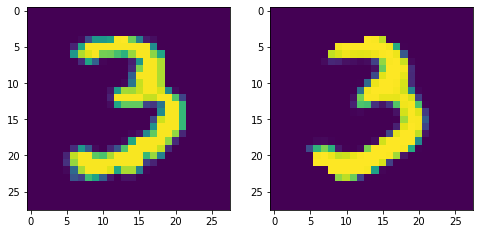

In [6]:
i = 9
img = images[i:i+1]

fig,axes = plt.subplots(1,2,figsize=(8,4))
axes[0].imshow(img.reshape(28,28))
axes[1].imshow(autoencoder.predict(img).reshape(28,28))

In [7]:
encodings = encoder.predict(images,batch_size=100)

### Clustering

#### Dense Autoencoder

In [8]:
from sklearn.cluster import KMeans
from pickle import dump,load

In [9]:
kmeans = KMeans(n_clusters=10)

In [10]:
kmeans.fit(encodings)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
clusters = kmeans.predict(encodings)

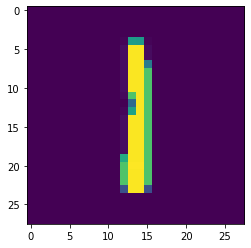

In [12]:
i = 2

img = images[i:i+1]

plt.imshow(img.reshape(28,28))

In [13]:
encoding = kmeans.predict(encoder(img))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [14]:
similer = images[encoding == clusters]

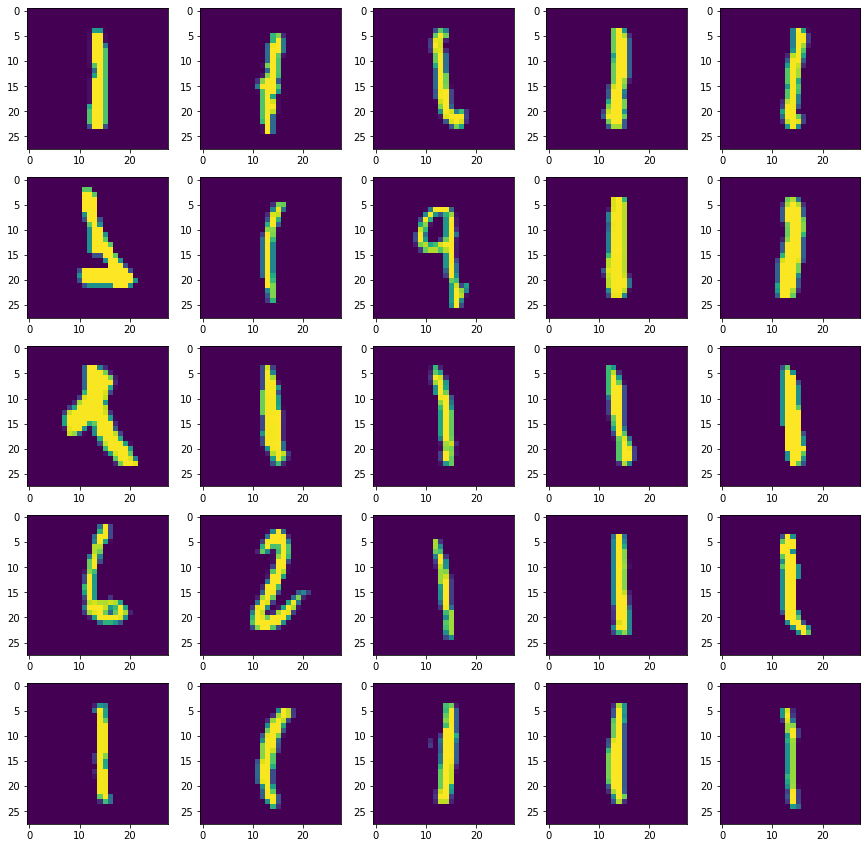

In [15]:
fig,axes = plt.subplots(5,5,figsize=(15,15))

imgs  = similer[0:25].reshape(-1,28,28)
axes = axes.reshape(25)

for i,a in zip(imgs,axes):
    a.imshow(i)

In [16]:
dump(kmeans,open("./weights/cluster_objects/kmeans_dense_cluster.pickle","wb"))

In [18]:
np.save("./weights/encodings/dense_autoencoder.npy",encodings)

#### Convolutional Auto Encoder

In [26]:
conv_ae,conv_e = utils.conv_autoencoder()

In [28]:
conv_ae.load_weights("./weights/models/conv_autoencoder/autoencoder")

In [29]:
conv_e.load_weights("./weights/models/conv_autoencoder/encoder")

In [31]:
images = images.reshape(-1,28,28,1)

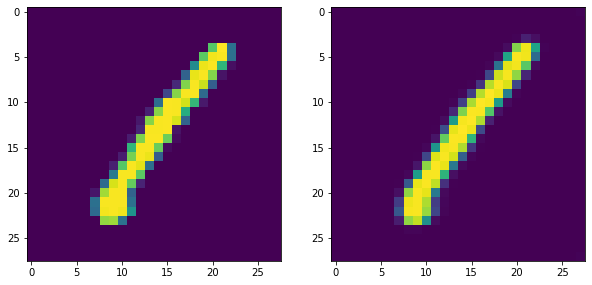

In [43]:
img = images[0]

fig,axes = plt.subplots(1,2,figsize=(10,5))
pred = conv_ae(img.reshape(1,28,28,1)).numpy().reshape(28,28)

axes[0].imshow(img.reshape(28,28))
axes[1].imshow(pred)

In [44]:
encodings = conv_e.predict(images)

In [86]:
kmeans_conv = KMeans(n_clusters=16)

In [87]:
kmeans_conv.fit(encodings)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [88]:
clusters = kmeans_conv.predict(encodings)

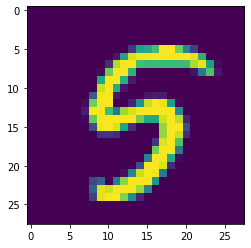

In [99]:
img = images[8]
plt.imshow(img.reshape(28,28))

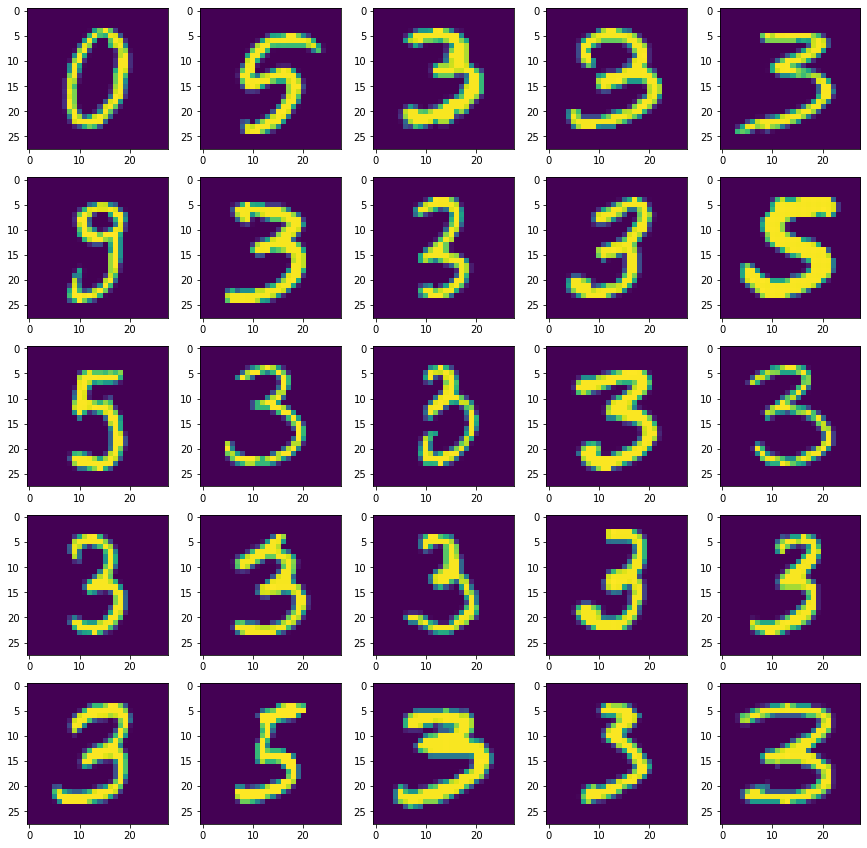

In [100]:
encoding = conv_e(img.reshape(1,28,28,1))
cluster = kmeans_conv.predict(encoding)
similar = images[cluster == clusters]

fig,axes = plt.subplots(5,5,figsize=(15,15))
imgs  = similar[0:25].reshape(-1,28,28)
axes = axes.reshape(25)

for i,a in zip(imgs,axes):
    a.imshow(i)